# Two-body problem module: Analysis notebook

### Directory structure

```bash
module/
├── __init__.py
├── analysis.py
├── analysis.ipynb
├── data/
│  ├── data.csv 
│  ├── data.json
```

### Relativistic vs. classical mechanics

##### (i) Use your module/script to run and show two simulations: one relativistic and one classical for this set of initial conditions. It may be helpful to compare the orbital history in a single plot.

| Parameter | Description                                       | Units      |
|-----------|---------------------------------------------------|------------|
| $e$       | Eccentricity of the orbit                         | $0$        |
| $M$       | Mass of the central black hole                    | $5\times 10^6\,\rm M_\odot$ |
| $a$       | Semi-major axis of the orbit                      | $1\,\rm AU$|
| $N$       | Number of orbital periods to simulate             | $2$        |
| Method    | Numerical method for ODE integration              | RK3        |

In [1]:
# Module import
from orbits import CelestialIntegrator

import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [2]:
# Set parameters
M = 5e6 # Solar masses
a = 1.0 # AU
e = 0.0
N = 2.0 
method = 'RK3'

In [3]:
# Instantiate the integrator
integrator = CelestialIntegrator(M, a, e)

In [4]:
# Classical case
t_class, S_class = integrator.integrate(relativistic = False, N = N, method = method, save = True) 

# Relativistic case
t_relat, S_relat = integrator.integrate(relativistic = True, N = N, method = method, save = True)

Results saved to outputfolder/e0.000-class-RK3.h5.
Results saved to outputfolder/e0.000-relat-RK3.h5.


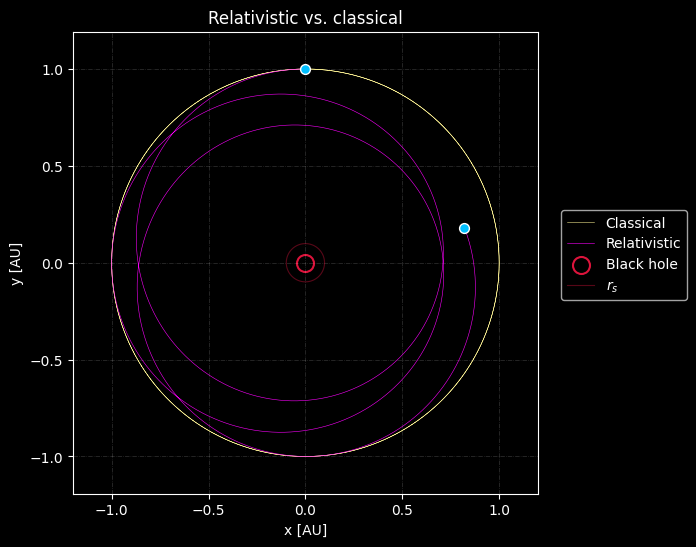

In [5]:
# Plot
plt.figure(figsize=(6, 6))

# Classical orbit
plt.plot(S_class[0], S_class[1], label='Classical', color='khaki', lw=0.4)
plt.scatter(S_class[0][-1], S_class[1][-1], color='deepskyblue',
            marker='o', edgecolors='w', s=50, zorder = 10)

# Relativistic orbit
plt.plot(S_relat[0], S_relat[1], label='Relativistic', color='magenta', lw=0.4)
plt.scatter(S_relat[0][-1], S_relat[1][-1], color='deepskyblue',
            marker='o', edgecolors='w', s=50, zorder = 10)

# Black hole and event horizon
plt.scatter(0, 0, label='Black hole', marker='o', color='k', s=150,
            edgecolor='crimson', lw = 1.5)
plt.plot(integrator.s_radius_x, integrator.s_radius_y, label=r'$r_s$',
         lw = 0.8, color = "crimson", alpha=0.4)

# Labels and title
plt.xlabel('x [AU]')
plt.ylabel('y [AU]')
plt.title('Relativistic vs. classical')
plt.legend(fontsize=10, loc=(1.05, 0.42))

plt.axis('equal')
plt.grid(alpha=0.2, ls ='-.', lw = 0.5)

max_x = np.max(S_class[0])
max_y = np.max(S_class[1])
maximum = np.max([max_x, max_y])

plt.xlim(-maximum*1.2, maximum*1.2)
plt.ylim(-maximum*1.2, maximum*1.2)

plt.show()
plt.close()

to ellaborate on: no precession

##### (j) Use the orbital history of both simulations to design a method that quantifies their differences and evaluates the importance of using the relativistic approach for massive objects. Do we need to worry about the relativistic corrections if we replace the black hole with our Sun?


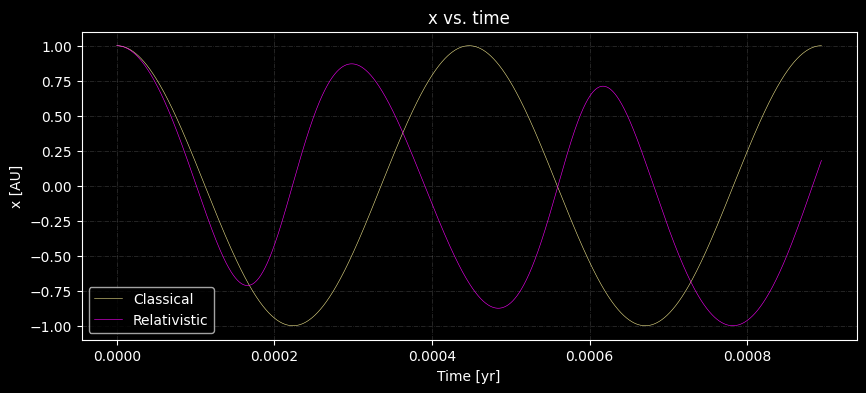

In [11]:
plt.figure(figsize=(10, 4))
plt.plot(t_class, S_class[1], label='Classical', color='khaki', lw=0.4)
plt.plot(t_relat, S_relat[1], label='Relativistic', color='magenta', lw=0.4)
plt.xlabel('Time [yr]')
plt.ylabel('x [AU]')
plt.title('x vs. time')
plt.legend()
plt.grid(alpha=0.2, ls ='-.', lw = 0.5)
#plt.xlim(0, max(t_class))
#plt.ylim(-maximum*1.2, maximum*1.2)
plt.show()

In [7]:
# Sun
M_sun = 1 # Solar masses

# Create another instance
integrator2 = CelestialIntegrator(M_sun, a, e)

In [8]:
# Classical case
t_class2, S_class2 = integrator2.integrate(relativistic = False, N = N, method = method)

# Relativistic case
t_relat2, S_relat2 = integrator2.integrate(relativistic = True, N = N, method = method)

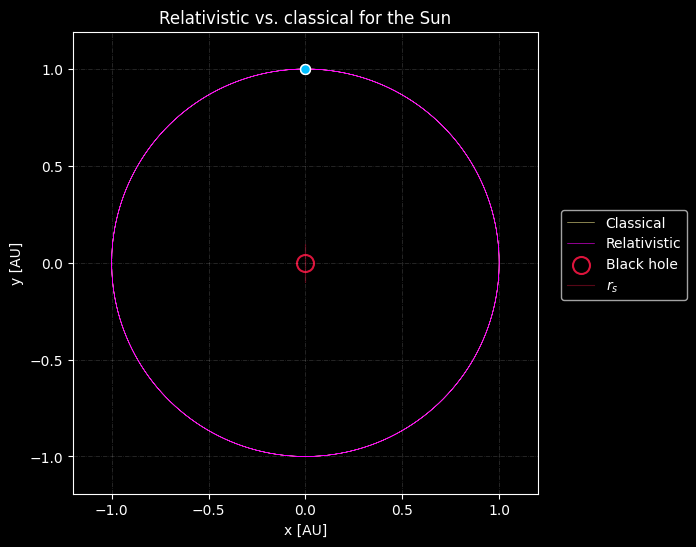

In [9]:
# Plot
plt.figure(figsize=(6, 6))

# Classical orbit
plt.plot(S_class2[0], S_class2[1], label='Classical', color='khaki', lw=0.4)
plt.scatter(S_class2[0][-1], S_class2[1][-1], color='deepskyblue',
            marker='o', edgecolors='w', s=50, zorder = 10)

# Relativistic orbit
plt.plot(S_relat2[0], S_relat2[1], label='Relativistic', color='magenta', lw=0.4)
plt.scatter(S_relat2[0][-1], S_relat2[1][-1], color='deepskyblue',
            marker='o', edgecolors='w', s=50, zorder = 10)

# Black hole and event horizon
plt.scatter(0, 0, label='Black hole', marker='o', color='k', s=150,
            edgecolor='crimson', lw = 1.5)
plt.plot(integrator2.s_radius_x, integrator.s_radius_y, label=r'$r_s$',
         lw = 0.8, color = "crimson", alpha=0.4)

# Labels and title
plt.xlabel('x [AU]')
plt.ylabel('y [AU]')
plt.title('Relativistic vs. classical for the Sun')
plt.legend(fontsize=10, loc=(1.05, 0.42))

plt.axis('equal')
plt.grid(alpha=0.2, ls ='-.', lw = 0.5)

plt.xlim(-maximum*1.2, maximum*1.2)
plt.ylim(-maximum*1.2, maximum*1.2)

plt.show()
plt.close()

short answer: no, we do not need to worry when the mass is that of the sun